<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    


# **TP Apprentissage par renforcement**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Algorithme Q-Learning

</div>

## Objectif

Le but de ce TP est de vous familiariser avec l'apprentissage automatique et notamment l'apprentissage par **renforcement**.

## Dépendances

Avant de commencer ce TP, assurez-vous d'avoir installé les bibliothèques Python suivantes : *NumPy* et *Matplotlib* (c'est en principe le cas).

#### Bibliothèques utilisées

- **NumPy** ([documentation](https://www.numpy.org/)) : *NumPy* est une bibliothèque de calcul matriciel largement utilisée pour ses fonctionnalités en algèbre linéaire, transformation de Fourier, et gestion des nombres aléatoires.
- **Matplotlib** ([documentation](https://matplotlib.org/)) : *Matplotlib* est une bibliothèque de visualisation en Python. 

In [2]:
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt, colors

## Introduction

L'apprentissage par **renforcement** est une méthode d'apprentissage automatique qui permet à des programmes informatiques, que nous appelons des "agents", d'apprendre à prendre des décisions optimales à travers des expériences. Imaginez un robot qui apprend à naviguer dans un labyrinthe ; à chaque intersection, il doit choisir entre tourner à gauche, à droite ou continuer tout droit. L'objectif est de trouver la sortie le plus rapidement possible. L'apprentissage par renforcement aide le robot à déterminer la meilleure action à prendre à chaque étape en fonction de sa position actuelle et des expériences passées.

#### Éléments de base

- L'**agent** : C'est l'entité qui apprend à accomplir une tâche. Par exemple, un bras robotique qui apprend à déplacer des objets, un robot sommelier qui propose le vin à associer à un plat, une voiture autonome qui ménage sa batterie, un agent conversationnel qui cherche à satisfaire la demande d'un client, etc.
- L'**environnement** : C'est le monde dans lequel l'agent opère. Pour un capteur dans une centrale nucléaire, l'environnement serait la centrale elle-même et les données qu'il mesure.
- Les **états** : Ce sont les différentes situations ou configurations possibles de l'environnement. Pour un capteur, un état pourrait être la lecture actuelle de la température ou de la pression.
- Les **actions** : Ce sont les différentes opérations que l'agent peut effectuer. Dans le cas de la robotique, cela pourrait être le déplacement d'un bras robotique ou l'ajustement d'un paramètre sur un capteur.
- Les **récompenses** : Après chaque action, l'agent reçoit une "récompense" ou une "punition" qui lui indique si l'action était bénéfique ou non. Un capteur qui détecte un risque dans la centrale pourrait déclencher une action qui prévient un accident, ce qui serait une grande récompense.

L'agent essaie différentes actions et apprend de ses erreurs et de ses succès. Au début, ses choix sont aléatoires, mais au fil du temps, il commence à reconnaître les chemins qui mènent à de meilleures récompenses.

Parmi les différents algorithmes d'apprentissage par renforcement, on trouve l'algorithme *Q-learning*.

## 1. Mise en oeuvre de l'algorithme Q-learning

L'algorithme *Q-learning* permet à un agent d'apprendre à prendre des décisions en calculant ce que l'on appelle une "table de qualité" (*Q-table* en anglais). Cette table aide l'agent à estimer quelles actions sont les plus prometteuses en termes de récompenses futures.
Le *Q-learning* est un algorithme dit "sans modèle", ce qui signifie qu'il n'a pas besoin de comprendre ou de modéliser l'environnement dans lequel il opère. Il apprend uniquement à partir des récompenses qu'il reçoit en conséquence de ses actions. C'est un peu comme si vous appreniez à trouver votre chemin dans une ville étrangère sans carte : au lieu de cela, vous vous souvenez des rues qui vous ont mené à des destinations agréables et vous évitez celles qui vous ont conduit dans des impasses.

Le *Q-learning* est particulièrement utile dans les situations où l'environnement est complexe et changeant, comme dans la gestion des opérations d'une centrale nucléaire, dans la navigation d'un robot dans un espace encombré ou à haut risque, et pourquoi pas d'un robot sommelier. Il permet à l'agent d'apprendre de ses erreurs et de s'adapter à de nouvelles situations sans avoir besoin de reprogrammation.

#### Comment fonctionne le Q-learning ?

La *Q-table* est un tableau qui indique la récompense attendue de chaque action dans chaque état. Chaque ligne de la table correspond à un état possible dans l'environnement, et chaque colonne correspond à une action possible que l'agent peut prendre.
Voici à quoi ressemble une *Q-table* pour un environnement simple avec 3 états et 2 actions possibles :

| États/Actions |  Action 1 |  Action 2 |
|---------------|-----------|-----------|
| État 1        | Q(e1, a1) | Q(e1, a2) |
| État 2        | Q(e2, a1) | Q(e2, a2) |
| État 3        | Q(e3, a1) | Q(e3, a2) |

- `Q(e1, a1)` est la valeur de la récompense si l'on choisit l'Action 1 lorsqu'on est dans l'État 1.
- `Q(e2, a2)` est la valeur de la récompense si l'on choisit l'Action 2 lorsqu'on est dans l'État 2, et ainsi de suite.

L'algorithme est le suivant :

1. **Initialisation** : On commence par créer la *Q-table* avec des valeurs initiales arbitraires. 
2. **Exploration** : L'agent explore l'environnement et, à chaque étape, met à jour la *Q-table* en fonction des récompenses obtenues. Au début, l'agent essaie des actions au hasard pour collecter des informations sur l'environnement.
3. **Exploitation** : Avec le temps, l'agent commence à utiliser les informations accumulées dans la *Q-table* pour choisir les actions qui semblent offrir les meilleures récompenses futures.
4. **Mise à jour de la Q-table** : Après chaque action, l'agent met à jour la *Q-table* en utilisant la formule de Bellman, qui intègre la récompense reçue et les récompenses futures estimées :
    $Q_{\text{nouveau}}(e, a) = Q(e, a) + \alpha \left[ r + \gamma \max_{a'} Q(e', a') - Q(e, a) \right]$

    où :
    - $Q(e, a)$ est la valeur actuelle de la *Q-table* pour l'état actuel $e$ et l'action $a$.
    - $Q_{\text{nouveau}}(e, a)$ est la nouvelle valeur mise à jour pour cet état et cette action.
    - $\alpha$ est le taux d'apprentissage, qui détermine à quel point les nouvelles informations influencent les anciennes. Une valeur plus élevée permet à l'agent d'apprendre plus rapidement, mais une valeur trop élevée peut rendre l'apprentissage instable. 
    - $r$ est la récompense reçue après avoir exécuté l'action $a$.
    - $\gamma$ est le facteur d'actualisation qui évalue l'importance des récompenses futures. Une valeur proche de 1 fera en sorte que l'agent valorise fortement les récompenses à long terme, alors que pour une valeur proche de 0 l'agent valorise les récompenses immédiates.
    - $\max_{a'} Q(e', a')$ est la valeur maximale de $Q$ pour le prochain état $e'$, en prenant en compte toutes les actions possibles $a'$. Cela représente la meilleure récompense future espérée.

> Remarque : vous pourrez avoir besoin de la fonction [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) pour récupérer $\max_{a'} Q(e', a')$.

#### Stratégie $\epsilon$-greedy

La stratégie $\epsilon$-greedy consiste à aider un algorithme à décider quand il est nécessaire d'essayer de nouvelles actions ou d'utiliser ce qu'il sait déjà. Autrement dit, c'est une stratégie qui va aider à choisir entre **exploration** de l'environnement et **exploitation** de celui-ci. Dans cette stratégie, le taux d'exploration $\epsilon$ est un nombre compris entre 0 et 1 qui peut varier avec le temps, notamment dans le cas d'un environnement dynamique.

L'algorithme est le suivant :

```
Si un nombre aléatoire est inférieur à epsilon :
    Choisir une action aléatoire parmi toutes les actions possibles. (Exploration)
Sinon :
    Choisir l'action qui a la plus haute valeur Q pour l'état actuel. (Exploitation)
```

Dans sa version de base, les actions testées sont choisies au hasard, sans penser à leur potentiel, ce qui est un inconvénient.

#### Une première mise en oeuvre

Voici deux premiers exercices qui n'ont pour seul intérêt que de vous entraîner à définir des états, des actions, une *Q-table* et de mettre en oeuvre la formule de Bellman afin de mettre à jour la table.

<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 1.1**

Imaginons un jeu où il y a trois gobelets retournés : 'A', 'B' et 'C'. Sous un de ces gobelets se trouve une récompense. Le but est de choisir le bon gobelet pour obtenir cette récompense. Au début, vous n'avez aucune idée du gobelet à choisir, mais avec le temps, vous pouvez apprendre quel gobelet a la plus grande probabilité de contenir la récompense.

##### Environnement
- **États** : Il n'y a qu'un seul état dans cet environnement, car il n'y a pas de séquence d'actions à prendre en compte.
- **Actions** : Les actions possibles consistent à choisir le gobelet 'A', 'B' ou 'C'.
- **Récompenses** : La récompense est de +1 si vous choisissez le bon gobelet, et 0 sinon.

##### Règles
Après chaque choix, le jeu vous informe si vous avez choisi le bon gobelet ou non.
La position de la récompense ne change pas pendant une "session" d'apprentissage, mais peut changer entre les sessions afin d'éviter que l'agent n'apprenne simplement à toujours choisir le même gobelet.

L'objectif est de coder un agent qui utilise le *Q-learning* pour déterminer le meilleur gobelet à choisir pour maximiser ses récompenses sur le long terme.

##### 1. Initialisation
Comme il n'y a qu'un seul état, la *Q-table* ne comporte qu'une seule ligne que nous appelerons `Q_values`. Nous la représentons par un dictionnaire dont les clés (actions) sont les noms des gobelets ('A', 'B' ou 'C') et les valeurs sont au départ à 0.
Le gobelet contenant la récompense est choisi aléatoirement à l'aide de la fonction `np.random.choice()`. Le taux d'exploration est fixé à 0.1, le taux d'apprentissage à 0.1 et le nombre d'épisodes à 100. 

##### 2. Choix d'action
Compléter la fonction `choose_action()` qui prend comme paramètre la table `Q_values` et `epsilon`, et qui applique une stratégie $\epsilon$-greedy. La fonction retourne une action aléatoire ou celle qui présente la plus grande valeur dans `Q_values`.

##### 3. Calcul des récompenses
Compléter la fonction `get_reward()` qui à chaque tour prend comme paramètre l'action retournée par `choose_action()` et le nom du gobelet gagnant. La fonction retourne 1 si le gobelet choisi correspond au gobelet gagnant, 0 sinon.

##### 4. Mise à jour des valeurs Q
Compléter la fonction `update_Q_values()` qui met à jour la valeur Q pour l'action choisie en utilisant la récompense reçue. Cette fonction réalise la formule de Bellman dans laquelle nous considérerons que $\gamma$ est nul.


L'entraînement est répété 100 fois afin d'apprendre quel gobelet a la plus haute valeur Q, c'est-à-dire la plus grande chance d'offrir une récompense.

---
    
</div>

In [3]:
# Initialisation des paramètres du Q-learning
Q_values = {'A': 0, 'B': 0, 'C': 0}  # Valeurs Q pour chaque action
reward_goblet = np.random.choice(['A', 'B', 'C'])  # Gobelet avec récompense
print(reward_goblet)
epsilon = 0.1  # Taux d'exploration
alpha = 0.1    # Taux d'apprentissage
episodes = 100
gamma = 0.99
# Nombre d'épisodes pour l'apprentissage

# Fonction pour choisir une action
def choose_action(Q_values, epsilon):
    choice = np.random.rand()
    if choice <= epsilon: # exploration
        chosen_goblet = np.random.choice(list(Q_values.keys()))
    else :
        chosen_goblet = list(Q_values.keys())[np.argmax(Q_values.values())]
    # À compléter pour choisir une action en utilisant epsilon-greedy
    return chosen_goblet

# Fonction pour obtenir une récompense
def get_reward(action, reward_goblet):
    reward = 0
    if reward_goblet == action:
        reward = 1
    return reward

# Fonction pour mettre à jour les valeurs Q en fonction de l'action, la réaction et la valeur de alpha
def update_Q_values(Q_values, action, reward, alpha):
    Q_values[action]  = Q_values[action] + alpha * (reward + gamma * np.argmax(Q_values[action]) - Q_values[action])

# Processus d'apprentissage
for episode in range(episodes):
    action = choose_action(Q_values, epsilon)
    reward = get_reward(action, reward_goblet)
    update_Q_values(Q_values, action, reward, alpha)

# Affichage des valeurs Q apprises
print("Valeurs Q : ", Q_values)

B
Valeurs Q :  {'A': np.float64(0.0), 'B': np.float64(0.19), 'C': np.float64(0.0)}


<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 1.2**

Imaginons un robot se déplaçant dans un couloir avec 5 positions possibles (0 à 4), où 0 est le point de départ et 4 est le point d'arrivée avec une récompense.

##### Environnement
- **États** : Ce sont les positions dans le couloir (de 0 à 4).
- **Actions** : Les actions possibles consistent à aller à gauche (0) ou à droite (1), sauf aux extrémités du couloir.
- **Récompenses** : La récompense est de +1 si le robot atteint la position 4, et 0 sinon.

##### 1. Initialisation
La *Q-table* est une matrice de 5 lignes (5 états pour 5 positions dans le couloir) et 2 colonnes (2 actions, 0 pour 'gauche' et 1 pour 'droite'). Le taux d'apprentissage est fixé à 0.1, le facteur de remise à 0.9 et le taux d'exploration à 0.1.

##### 2. Choix d'action
Compléter la fonction `choose_action()` qui prend comme paramètre l'état, et qui applique une stratégie $\epsilon$-greedy. La fonction retourne une action aléatoire ou celle qui présente la plus grande valeur dans `Q_table`.

##### 3. Déterminer le nouvel état
Compléter la fonction `get_next_state()` qui prend comme paramètre l'action à réaliser et retourne le nouvel état. Cette fonction doit s'assurer que le nouvel état ne dépasse pas les limites.

##### 3. Calcul des récompenses
Compléter la fonction `get_reward()` qui prend comme paramètre le nouvel état retourné par `get_next_state()`. La fonction retourne 1 si l'état correspond à la position 4, 0 sinon.

##### 4. Mise à jour des valeurs Q
Compléter la fonction `update_Q_table()` qui met à jour la valeur Q pour l'action choisie en utilisant la récompense reçue. Cette fonction réalise la formule de Bellman.


L'apprentissage est répété 100 fois.

---
    
</div>

In [4]:
# Paramètres de l'algorithme Q-learning
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur d'actualisation
epsilon = 0.1  # Taux d'exploration
num_episodes = 100  # Nombre total d'épisodes pour l'entraînement 

# Initialisation de la table Q
num_states = 5
num_actions = 2  # 0: gauche, 1: droite
Q = np.zeros((num_states, num_actions))

# Fonction pour choisir une action
def choose_action(state):
    choice = np.random.rand()
    if choice < epsilon:
        action = np.random.choice([i for i in range(num_actions)])
    else:
        action = np.argmax(Q[state])
    return action

# Fonction pour déterminer le nouvel état suite à l'action
def get_next_state(action , state):
    if action == 1:
        step = 1
    else:
        step = -1
    
    new_state = state + step
    if new_state >4 or new_state< 0:
        new_state = state
    return new_state

# Fonction pour obtenir une récompense
def get_reward(next_state):
    return 1 if next_state == 4 else 0

# Fonction pour mettre à jour la table Q
def update_Q(state, action, reward, next_state):
    Q[state,action] = Q[state,action] + alpha * (reward + gamma * np.amax(Q[next_state]) - Q[state,action])

# Boucle d'apprentissage
for episode in range(num_episodes):
    state = 0  # On commence toujours à la position 0
    done = False
    
    while not done:
        action = choose_action(state)
        next_state = get_next_state(action , state)
        reward = get_reward(next_state)
        update_Q(state, action, reward, next_state)
        state = next_state
        
        if state == num_states - 1:
            done = True  # L'objectif est atteint
# Tester l'agent après l'entraînement
state = 0


while state != num_states - 1:
    action = np.argmax(Q[state])
    state += 1 if action == 1 else -1
    print(f"L'agent se déplace vers {'la droite' if action == 1 else 'la gauche'}, nouvelle position: {state}")


 epoch 0
[[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.1]
 [0.  0. ]]
 epoch 1
[[0.    0.   ]
 [0.    0.   ]
 [0.    0.009]
 [0.    0.19 ]
 [0.    0.   ]]
 epoch 2
[[0.      0.     ]
 [0.      0.00081]
 [0.      0.0252 ]
 [0.      0.271  ]
 [0.      0.     ]]
 epoch 3
[[0.000e+00 7.290e-05]
 [0.000e+00 2.997e-03]
 [0.000e+00 4.707e-02]
 [0.000e+00 3.439e-01]
 [0.000e+00 0.000e+00]]
 epoch 4
[[0.0000e+00 3.3534e-04]
 [0.0000e+00 6.9336e-03]
 [0.0000e+00 7.3314e-02]
 [0.0000e+00 4.0951e-01]
 [0.0000e+00 0.0000e+00]]
 epoch 5
[[0.         0.00092583]
 [0.         0.0128385 ]
 [0.         0.12941055]
 [0.00925547 0.468559  ]
 [0.         0.        ]]
 epoch 6
[[0.         0.00198871]
 [0.         0.0232016 ]
 [0.         0.15863981]
 [0.00925547 0.5217031 ]
 [0.         0.        ]]
 epoch 7
[[0.         0.00387798]
 [0.         0.03515902]
 [0.         0.1897291 ]
 [0.00925547 0.56953279]
 [0.         0.        ]]
 epoch 8
[[0.         0.0066545 ]
 [0.         0.04871874]
 [0.         0.222014

## 2. Application à la simulation de navigation d'un robot

Dans cet exercice plus avancé, nous allons simuler un robot qui doit naviguer dans un environnement afin d'atteindre un objectif tout en évitant des obstacles et des zones radioactives.

### Contexte
Nous supposons que le robot est équipé d'un capteur unifié permettant à la fois de détecter les obstacles, les zones radioactives et les limites de l'environnement. L'objectif est de naviguer de son point de départ à un point d'arrivée spécifié sans entrer en collision avec les obstacles et en évitant les zones radioactives.

### Environnement
L'environnement est une grille de taille 5$\times$5, avec des obstacles statiques et des zones irradiées. Le robot peut recevoir des informations de son capteur indiquant la distance aux obstacles et aux zones radioactives les plus proches dans chaque direction.

### Règles
- Le robot peut se déplacer dans quatre directions: haut, bas, gauche, droite.
- Les obstacles et les zones radioactives sont fixés aléatoirement au départ et ne changent pas de position en cours de simulation.
- Si le robot entre en collision avec un obstacle, une pénalité de -50 est attribuée.
- Si le robot pénètre dans une zone radioactive, une pénalité de -100 est attribuée.
- Atteindre l'objectif donne une récompense de +100.
- Le capteur a une portée limitée et ne peut détecter des obstacles et des zones radioactives que dans un certain rayon.

### Implémentation avec des classes
Nous allons définir plusieurs classes pour représenter l'environnement, le robot et le capteur :

- Classe `Environment` : Cette classe représente la grille et gére les positions des obstacles, des zones radioactives et de l'objectif à atteindre.
- Classe `Robot` : Cette classe représente notre agent et possède une méthode pour choisir une action basée sur les entrées de son capteur et une méthode pour mettre à jour sa position dans l'environnement.
- Classe `Sensor` : Cette classe simule le capteur du robot et fournit des informations sur son environnement.
- Classe `Simulation` : Cette classe orchestre l'interaction entre le robot et l'environnement, et permet de visualiser les résultats.



<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 2.1 : Création de la classe Environment**

**1. Initialisation de l'environnement** :

La classe `Environment` est munie des attributs `size` (taille d'un côté de la grille carrée), `obstacles` (un ensemble / `set` contenant les obstacles), `radioactive_zones` (un ensemble / `set` contenant les zones radioactives) et `target_position` (la position de la cible). 
Les obstacles et les zones radioactives doivent être placés aléatoirement dans la grille, en veillant à ce qu'ils ne se trouvent pas sur la position de départ du robot (0, 0) ni sur la position de la cible à atteindre.
Le contructeur prend les paramètres `size`, `obstacle_count` (nombre d'obstacles), `radioactive_count` (nombre de zones radioactives) et `target_position`, et il appelle les méthodes privées `_generate_obstacles()` et `_generate_radioactive_zones()` afin de peupler l'environnement avec le nombre spécifié d'obstacles et de zones radioactives. 

**2. Génération des obstacles et des zones radioactives** :

Implémentez les méthodes privées `_generate_obstacles()` et `_generate_radioactive_zones()` pour peupler l'environnement avec le nombre spécifié d'obstacles et de zones radioactives. Ces méthodes **sont appelées depuis le constructeur**. Assurez-vous que les obstacles et les zones radioactives ne se chevauchent pas et ne sont pas placés sur la position initiale ou la position de la cible.

**3. Détection des bords, des obstacles et des zones radioactives** :

La méthode `is_edge()` doit déterminer si une position donnée est sur le bord de la grille.
Les méthodes `is_obstacle()` et `is_radioactive()` doivent vérifier si une position donnée contient un obstacle ou une zone radioactive, respectivement.

**4. Affichage de l'environnement** :

La méthode `display()` doit créer et retourner une représentation sous forme de grille de l'environnement, où les cases vides sont marquées par 0, les obstacles par -1, les zones radioactives par -2, et la position du but par 1.

**5. Test de la classe** :

Testez la classe `Environment` à l'aide du code fourni plus bas.

**Consignes supplémentaires** :

Utilisez la bibliothèque *Numpy* pour générer des nombres aléatoires lors de la création des obstacles et des zones radioactives.
Veillez à ce que la position de la cible soit toujours accessible et ne soit pas bloquée par un obstacle ou une zone radioactive.
Assurez-vous que la méthode `display()` renvoie une grille qui reflète correctement l'état actuel de l'environnement. 

---

</div>

In [4]:
class Environment:
    def __init__(self, size, obstacle_count, radioactive_count, target_position):
        pass

    def _generate_obstacles(self, obstacle_count):
        pass

    def _generate_radioactive_zones(self, radioactive_count):
        pass

    def is_edge(self, position):
        pass

    def is_obstacle(self, position):
        pass

    def is_radioactive(self, position):
        pass

    def get_target_position(self):
        pass

    def display(self):
        pass

#### Exemple d'utilisation

In [5]:
size = 5 # grille de 5x5
obstacle_count = 3
radioactive_count = 2
target_position = (size - 1, size - 1)

env = Environment(size, obstacle_count, radioactive_count, target_position)
print(env.display())

[[0, 0, -2, 0, 0], [-1, 0, 0, 0, 0], [0, 0, -2, -1, 0], [0, -1, 0, 0, 0], [0, 0, 0, 0, 1]]


#### Test de la classe `Environment`

Assurez-vous que la classe `Environment` est définie dans une des cellules précédentes.

In [7]:
# Exemple de tests pour la classe Environment.

# Création de l'environnement avec des paramètres spécifiques
size = 5
obstacle_count = 2
radioactive_count = 2
target_position = (4, 4)
env = Environment(size, obstacle_count, radioactive_count, target_position)

# Vérifier que la taille de l'environnement est correcte
assert env.size == size, f"Taille attendue: {size}, obtenue: {env.size}"

# Vérifier que le nombre d'obstacles est correct
assert len(env.obstacles_count) == obstacle_count, f"Nombre d'obstacles attendu: {obstacle_count}, obtenu: {len(env.obstacles)}"

# Vérifier que le nombre de zones radioactives est correct
assert len(env.radioactive_zones) == radioactive_count, f"Nombre de zones radioactives attendu: {radioactive_count}, obtenu: {len(env.radioactive_zones)}"

# Vérifier que la position de l'objectif est correcte
assert env.target_position == target_position, f"Position de l'objectif attendue: {target_position}, obtenue: {env.target_position}"

# Vérifier que la méthode display renvoie une matrice de la bonne taille
display = env.display()
assert isinstance(display, list), "La méthode display doit retourner une liste."
assert all(isinstance(row, list) for row in display), "Chaque élément de la liste renvoyée par display doit être une liste."
assert all(len(row) == size for row in display), "Chaque sous-liste renvoyée par display doit avoir une longueur égale à size."

# Vérifier que les coins de la grille font partie de la bordure
corners = [(0, 0), (0, 4), (4, 0), (4, 4)]
for corner in corners:
    assert env.is_edge(corner), f"Le coin en position {corner} devrait être détecté comme bordure."

# Le centre de la grille ne peut pas faire partie de la bordure dans notre cas
center = (2, 2)
assert not env.is_edge(center), f"Le centre {center} ne devrait pas être détecté comme bordure."

# Vérifier que les bords sont détectés
edges = [(0, 1), (0, 2), (0, 3), (1, 0), (1, 4), (2, 0), (2, 4), (3, 0), (3, 4), (4, 1), (4, 2), (4, 3)]
for edge in edges:
    assert env.is_edge(edge), f"La cellule en position {corner} devrait être détecté comme bordure."

# Vérifier que les obstacles et les zones radioactives sont correctement placés dans la matrice renvoyée par display
for y, row in enumerate(display):
    for x, cell in enumerate(row):
        if (x, y) in env.obstacles:
            assert cell == -1, f"Obstacle attendu en position {(x, y)}, mais obtenu {cell}"
        elif (x, y) in env.radioactive_zones:
            assert cell == -2, f"Zone radioactive attendue en position {(x, y)}, mais obtenu {cell}"
        elif (x, y) == env.target_position:
            assert cell == 1, f"Objectif attendu en position {(x, y)}, mais obtenu {cell}"
        else:
            assert cell == 0, f"Case vide attendue en position {(x, y)}, mais obtenu {cell}"

print("Tous les tests pour la classe Environment ont réussi.")

Tous les tests pour la classe Environment ont réussi.


<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 2.2 : Création de la classe Sensor**

Vous allez développer une classe `Sensor` qui simule le fonctionnement d'un capteur pour un robot. Ce capteur permet de détecter des obstacles, des zones radioactives et les bords de l'environnement dans lequel le robot se déplace.

**1. Initialisation du capteur** :

La classe `Sensor` doit être initialisée avec un paramètre `range_detection` qui définit la portée de détection du capteur.
La portée de détection est la distance maximale à laquelle le capteur peut détecter un élément dans l'environnement.

**2. Détection dans l'environnement** :

Implémentez la méthode `detect()` qui prend en paramètres une position (sous forme de tuple de coordonnées) et un environment (instance de la classe `Environment`). La méthode doit retourner un dictionnaire appelé `readings` dont les clés `'up'`, `'down'`, `'left'`, et `'right'` correspondent aux directions dans lesquelles le capteur effectue ses détections, et les valeurs correspondent au type de case :

- Si un obstacle est détecté dans une direction, la valeur correspondante dans le dictionnaire `readings` doit être -1.
- Si une zone radioactive est détectée, la valeur doit être -2.
- Si le bord de l'environnement est détecté, la valeur doit être -3.
- Si rien n'est détecté dans la portée du capteur pour une direction donnée, la valeur doit rester 0.
 
Pour chaque direction, le capteur doit sonder l'environnement à partir de la position donnée, jusqu'à atteindre sa portée maximale ou rencontrer un élément à détecter.

**3. Calcul de la position du capteur** :

La méthode privée `_probe_position()` doit calculer et retourner la position de la case sondée par le capteur en fonction de la direction et de la distance spécifiées. Cette méthode est utilisée par `detect()` pour déterminer la position à sonder dans l'environnement.

**Consignes supplémentaires** :

Assurez-vous que la méthode `detect()` vérifie correctement les conditions de l'environnement en utilisant les méthodes `is_obstacle()`, `is_radioactive()`, et `is_edge()` fournies par l'instance de `Environment`.
La détection doit s'arrêter immédiatement si un élément est détecté ou si la cellule sondée est au bord de l'environnement, quelle que soit la portée du capteur.
La méthode `_probe_position()` est privée n'est utilisée qu'en interne par la classe `Sensor`.

**Bonus** :

Si vous avez terminé l'implémentation de base, essayez d'ajouter une fonctionnalité supplémentaire où le capteur peut détecter plusieurs éléments dans une direction donnée et retourner une liste des détections au lieu d'une seule valeur.


---
    
</div>

In [8]:
class Sensor:
    def __init__(self, range_detection):
        pass

    def detect(self, position, environment):
        pass

    def _probe_position(self, position, direction, distance):
        pass


#### Exemple d'utilisation

```python
sensor = Sensor(range_detection=3)
robot_position = (0, 0)  # Position hypothétique du robot

# Supposons que l'environnement 'env' a été créé précédemment
sensor_readings = sensor.detect(robot_position, env)
print(sensor_readings)
```

#### Test de la classe `Sensor`

Assurez-vous que les classes `Environment` et `Sensor` sont définies dans les cellules précédentes.

In [12]:
# Exemple de tests pour votre classe Sensor.
size = 5
obstacle_count = 2
radioactive_count = 2
goal_position = (4, 4)
env = Environment(size, obstacle_count, radioactive_count, goal_position)

# Création d'un capteur
sensor = Sensor(range_detection=1)

# Position de test pour le robot
robot_position = (2, 2)

# Test de la détection des obstacles et des zones radioactives
# Nous plaçons manuellement des obstacles et des zones radioactives pour ce test
env.obstacles = [(1, 2), (3, 2)]  # Gauche et droite du robot
env.radioactive_zones = [(2, 1), (2, 3)]  # Haut et bas du robot

# Détecter les obstacles et les zones radioactives
detections = sensor.detect(robot_position, env)

# Vérifier que les obstacles sont correctement détectés
expected_obstacle_detections = {'left': -1, 'right': -1, 'up': -2, 'down': -2}
for direction, detection in expected_obstacle_detections.items():
    assert detections[direction] == detection, f"Obstacle mal détecté à {direction}: attendu {detection}, obtenu {detections[direction]}"

# Vérifier que les zones radioactives sont correctement détectées
expected_radioactive_detections = {'left': 0, 'right': 0, 'up': -2, 'down': -2}
for direction, detection in expected_radioactive_detections.items():
    # Nous espérons des zones radioactives uniquement vers le haut et vers le bas
    if direction in ['up', 'down']:
        assert detections[direction] == detection, f"Zone radioactive mal détectée à {direction}: attendu {detection}, obtenu {detections[direction]}"

# Test de la détection des limites de l'environnement
edge_position = (1, 1)  # Position du robot près d'un bord de l'environnement
detections = sensor.detect(edge_position, env)

# Vérifier que les limites sont correctement détectées
expected_edge_detections = {'left': -3, 'right': -2, 'up': -3, 'down': -1}
for direction, detection in expected_edge_detections.items():
    assert detections[direction] == detection, f"Limite mal détectée à {direction}: attendu {detection}, obtenu {detections[direction]}"

print("Tous les tests pour la classe Sensor ont réussi.")

Tous les tests pour la classe Sensor ont réussi.


<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 2.3 : Création de la classe Robot**

Écrire la classe `Robot` avec les attributs et méthodes décrits ci-dessous.

**Attributs** :

- `actions` : Une liste des actions possibles que le robot peut prendre (`'up'`, `'down'`, `'left'`, `'right'`).
- `Q_table` : un dictionnaire  vide qui stockera les valeurs Q pour chaque paire état-action.
- `sensor` : Un attribut qui stockera une instance de la classe Sensor (non fournie ici, à supposer existante).
- `position` : La position actuelle du robot dans l'environnement (initialisée à (0, 0) au départ).
- `environment` : L'environnement dans lequel le robot évolue (doit être défini avant que le robot puisse agir).
- `verbose` : Un booléen qui, lorsqu'il est à True, active l'affichage de détails sur les actions et les positions du robot.

**Méthodes** :

- `__init__()` : Initialise le robot avec une position de départ et un mode verbeux optionnel.
- `set_environment()` : Attribue un environnement au robot.
- `reset()` : Réinitialise la position du robot à sa position de départ.
- `set_sensor()` : Attribue un capteur au robot.
- `choose_action()` : Sélectionne une action à partir de l'état actuel à l'aide d'une stratégie $\epsilon$-greedy.
- `update_Q_table()` : Met à jour la table Q en utilisant l'équation de Bellman.
- `take_action()` : Fait prendre une action au robot et retourne la récompense associée à cette action.

**Consignes supplémentaires** :

- Lorsque le robot prend une action, il doit vérifier si la nouvelle position est un obstacle, une zone radioactive, ou l'objectif. Les récompenses sont attribuées comme suit : -50 pour un obstacle, -100 pour une zone radioactive, 100 pour l'objectif, -1 si le robot tente de sortir de la grille, et 0 pour tout autre déplacement valide.
- Si le robot tente de se déplacer en dehors de la grille, il doit rester sur place et recevoir une pénalité.
- La méthode `take_action()` doit également gérer les cas où l'environnement n'est pas défini.

---

</div>

In [30]:
class Robot:
    def __init__(self, start_position=(0, 0), verbose=False):
        pass

    def set_environment(self, environment):
        pass

    def reset(self):
        pass

    def set_sensor(self, sensor):
        pass

    def choose_action(self, state, epsilon):
        pass

    def update_Q_table(self, old_state, action, reward, new_state, alpha, gamma):
        pass

    def take_action(self, action):
        pass


#### Exemple d'utilisation

```python
env = Environment(size=5, obstacle_count=2, radioactive_count=3, target_position=(4, 4))
robot = Robot()
robot.set_environment(env)

old_state = robot.position
action = robot.choose_action(old_state, epsilon=0.1)
reward = robot.take_action(action)
new_state = robot.position
robot.update_Q_table(old_state, action, reward, new_state, alpha=0.1, gamma=0.9)
```

#### Test de la classe `Robot`

Assurez-vous que les classes `Environment`, `Sensor` et `Robot` sont définies dans les cellules précédentes.

In [31]:
size = 5
obstacle_count = 2
radioactive_count = 2
target_position = (4, 4)
env = Environment(size, obstacle_count, radioactive_count, target_position)

# Création d'un robot avec son capteur unifié et associé à l'environnement
sensor = Sensor(range_detection=1)
robot = Robot(start_position=(0, 0), verbose=True)
robot.set_environment(env)
robot.set_sensor(sensor)

# Test de la réinitialisation du robot
robot.reset()
assert robot.position == (0, 0), "La position du robot devrait être réinitialisée à (0, 0)."

# Test de la sélection d'action epsilon-greedy
epsilon = 0.1  # 10% de chance de choisir une action aléatoire
action = robot.choose_action(robot.position, epsilon)
assert action in robot.actions, "L'action choisie doit être parmi les actions possibles."

# Assurez-vous qu'il n'y a pas de zone radioactive à la position (0, 1)
assert not env.is_radioactive((0, 1)), "Il ne devrait pas y avoir de zone radioactive à la position initiale pour ce test."

# Placez un obstacle à la position (0, 1) et vérifiez que `is_obstacle` renvoie `True`
env.obstacles = [(0, 1)]
assert env.is_obstacle((0, 1)), "La position (0, 1) devrait être un obstacle."

# Maintenant, effectuez le test de prise d'action avec l'obstacle
reward = robot.take_action('right')
assert reward == -50, "La récompense devrait être -50 pour avoir frappé un obstacle."

# Place une zone radioactive à la position (0, 2) et vérifie que is_radioactive renvoie True
env.radioactive_zones = [(0, 2)]
assert env.is_radioactive((0, 2)), "La position (0, 2) devrait être radioactive."

# Effectuons le test de prise d'action avec la zone radioactive
robot.reset()
reward = robot.take_action('right')
reward = robot.take_action('right')
print(f"Récompense : {reward}")
assert reward == -100, "La récompense devrait être -100 pour être entré dans une zone radioactive."

# Maintenant, rendons nous sur l'objectif
reward = robot.take_action('right')
reward = robot.take_action('right')
reward = robot.take_action('down')
reward = robot.take_action('down')
reward = robot.take_action('down')
reward = robot.take_action('down')
print(f"Récompense : {reward}")
assert reward == 100, "La récompense devrait être 100 pour avoir atteint l'objectif."

print("Tous les tests pour la classe Robot ont réussi.")


Action : right, ancienne position : (0, 0), nouvelle position: (0, 1)
Obstacle à la nouvelle position : True
Radioactivité à la nouvelle position : False
Bordure à la nouvelle position : True
Position de l'objectif : (4, 4)
Action : right, ancienne position : (0, 0), nouvelle position: (0, 1)
Obstacle à la nouvelle position : True
Radioactivité à la nouvelle position : False
Bordure à la nouvelle position : True
Position de l'objectif : (4, 4)
Action : right, ancienne position : (0, 1), nouvelle position: (0, 2)
Obstacle à la nouvelle position : False
Radioactivité à la nouvelle position : True
Bordure à la nouvelle position : True
Position de l'objectif : (4, 4)
Récompense : -100
Action : right, ancienne position : (0, 2), nouvelle position: (0, 3)
Obstacle à la nouvelle position : False
Radioactivité à la nouvelle position : False
Bordure à la nouvelle position : True
Position de l'objectif : (4, 4)
Action : right, ancienne position : (0, 3), nouvelle position: (0, 4)
Obstacle à la n

<div style="background-color:rgba(255, 183, 77, 0.6); padding:5pt" >    

---

#### **Exercice n° 2.4**

La classe `Simulation`, vous allez intégrer plusieurs composants qui interagissent ensemble pour simuler un robot se déplaçant dans un environnement. Voici un guide étape par étape pour vous aider à comprendre et à coder cette classe.

##### 1. Initialisation de la classe
Le constructeur `__init__()` initialise le robot et son environnement, ainsi que le capteur. Il prend comme paramètres :

- `robot` : une instance de la classe `Robot`.
- `environment` : une instance de la classe `Environment`.
- `sensor` : une instance de la classe `Sensor`.
- `verbose` : un booléen qui, lorsqu'il est à True, active l'affichage de messages détaillés pendant la simulation. Il est à False par défaut.

##### 2. Entraînement du robot
La méthode `train()` est utilisée pour entraîner le robot à naviguer dans l'environnement. Elle prend comme paramètres :

- `episodes` : le nombre total d'épisodes d'entraînement.
- `max_steps_per_episode` : le nombre maximum de pas que le robot peut prendre dans un épisode.
- `epsilon` : le taux d'exploration qui contrôle le compromis entre exploration et exploitation.
- `alpha` : le taux d'apprentissage.
- `gamma` : le facteur d'actualisation.

##### 3. Trouver le meilleur chemin
La méthode `find_best_path()` ne prend aucun paramètre. Elle réinitialise la position du robot et suit le meilleur chemin qu'il a appris jusqu'à ce qu'il atteigne l'objectif ou qu'une condition d'arrêt soit rencontrée. Cette méthode est appelée par `visualize_best_path()`.

Les méthodes `visualize()` et `visualize_best_path()` sont fournies afin de vous aider à visualiser l'environnement et le chemin que le robot prend. Les cases blanches représentent les espaces libres, les cases rouges les zones radioactives, les cases grises les obstacles, et la case verte l'objectif à atteindre. Le robot est également affiché sur la grille.

---
    
</div>

In [142]:
class Simulation:
    def __init__(self, robot, environment, sensor, verbose=False):
        # A compléter
        pass

    def train(self, episodes, max_steps_per_episode, epsilon, alpha, gamma):
        # A compléter
        pass

    def find_best_path(self):
        # A compléter
        pass

    def visualize(self):
        grid = self.environment.display()
        # Zone radioactive : rouge ; obstacle : gris ; case vide : blanc ; objectif : vert
        cmap = colors.ListedColormap(['red', 'gray', 'white', 'green'])
        bounds = [-2, -1, 0, 1, 2]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        fig, ax = plt.subplots()
        ax.imshow(grid, cmap=cmap, norm=norm, extent=[-0.5, self.environment.size-0.5, self.environment.size-0.5, -0.5])

        # Ajoute du texte aux cases avec obstacle ('x'), zone radioactive ('r'), objectif ('T') et robot ('Robot')
        for obstacle in self.environment.obstacles:
            ax.text(obstacle[0], obstacle[1], 'x', va='center', ha='center', color='black')
        for radioactive in self.environment.radioactive_zones:
            ax.text(radioactive[0], radioactive[1], 'r', va='center', ha='center', color='black')
        target = self.environment.get_target_position()
        ax.text(target[0], target[1], 'T', va='center', ha='center', color='black')
        robot_pos = self.robot.position
        ax.text(robot_pos[0], robot_pos[1], 'Robot', va='center', ha='center', color='black')
        
        # Tracé de la grille
        ax.set_xticks(np.arange(-0.5, self.environment.size, 1))
        ax.set_yticks(np.arange(-0.5, self.environment.size, 1))
        ax.grid(which='major', color='k', linestyle='-', linewidth=2)

        # Limites pour les axes
        ax.set_xlim(-0.5, self.environment.size-0.5)
        ax.set_ylim(-0.5, self.environment.size-0.5)

        # Suppression des labels sur les axes
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Inversion de l'axe vertical
        ax.invert_yaxis()

        plt.show()
        plt.pause(0.001)

    def visualize_best_path(self):
        best_path = self.find_best_path()
        grid = self.environment.display()
        # Zone radioactive : rouge ; obstacle : gris ; case vide : blanc ; objectif : vert
        cmap = colors.ListedColormap(['red', 'gray', 'white', 'green'])
        bounds = [-2, -1, 0, 1, 2]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        fig, ax = plt.subplots()
        ax.imshow(grid, cmap=cmap, norm=norm, extent=[-0.5, self.environment.size-0.5, self.environment.size-0.5, -0.5])

        # Annotate grid with obstacle, radioactive, goal, and robot markers
        for obstacle in self.environment.obstacles:
            ax.text(obstacle[0], obstacle[1], 'x', va='center', ha='center', color='black')
        for radioactive in self.environment.radioactive_zones:
            ax.text(radioactive[0], radioactive[1], 'r', va='center', ha='center', color='black')
        target = self.environment.get_target_position()
        ax.text(target[0], target[1], 'T', va='center', ha='center', color='black')
        robot_pos = self.robot.position
        ax.text(robot_pos[0], robot_pos[1], 'Robot', va='center', ha='center', color='black')

        # Draw the best path with dotted lines
        for (y, x) in best_path:
            ax.plot(x, y, 'bo')  # Mark the path with blue dots

        # Optionally, you can draw lines instead of dots
        if len(best_path) > 1:
            for i in range(len(best_path) - 1):
                start = best_path[i]
                end = best_path[i + 1]
                ax.plot([start[0], end[0]], [start[1], end[1]], 'b--')  # Draw lines with blue dashed

        # Set the grid lines
        ax.set_xticks(np.arange(-0.5, self.environment.size, 1))
        ax.set_yticks(np.arange(-0.5, self.environment.size, 1))
        ax.grid(which='major', color='k', linestyle='-', linewidth=2)

        # Set the axis limits
        ax.set_xlim(-0.5, self.environment.size-0.5)
        ax.set_ylim(-0.5, self.environment.size-0.5)

        # Remove axis labels
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Invert y-axis to have the origin at the bottom left
        ax.invert_yaxis()

        plt.show()
        plt.pause(0.001)


#### Créer et entraîner une simulation 

In [1]:
# Utilisation de la classe Simulation
env = Environment(size=5, obstacle_count=2, radioactive_count=2, target_position=(4, 4))
sensor = Sensor(range_detection=1)
robot = Robot(start_position=(0, 0))
simulation = Simulation(robot, env, sensor)

# Paramètres de la simulation
episodes = 10000
max_steps_per_episode = 100
epsilon = 0.1  # Probabilité de choisir une action aléatoire
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur d'actualisation

# Visualiser l'environnement avant entraînement
simulation.visualize()

# Entraîner le robot
simulation.train(episodes, max_steps_per_episode, epsilon, alpha, gamma)

# Visualiser l'environnement après entraînement
simulation.visualize()

NameError: name 'Environment' is not defined

#### Trouver et visualiser le meilleur chemin

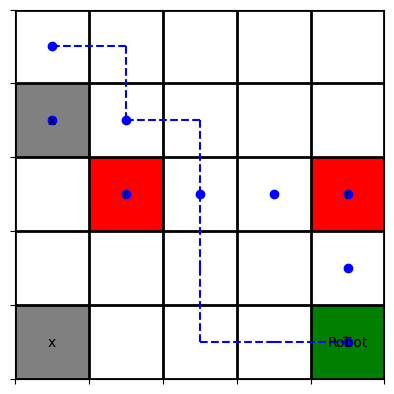

In [163]:
simulation.visualize_best_path()